# Projeto A3 Análise de Dados (Análise descritiva do conjunto de dados)

## Identificação da Equipe


*   **IAN MENEZES SILVA PEREIRA CARVALHO**.

*   **AMANDA NASCIMENTO CAMPOS**.

*   **BRENO BARRETO CAMPOS**.

*   **GABRIEL FAGUNDES DE ALMEIDA**.

## Introdução aos dados

### Imports

In [ ]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

### Procedimentos de coleta dos dados

Neste projeto, reunimos **quatro** conjuntos de dados sobre o tema "Filmes e Afins".

Os quatro conjuntos coletados contém filmes e séries, cada um de uma plataforma de streaming diferente: **Netflix**, **Amazon Prime**, **Disney+** e **Hulu**.

Todos os conjuntos de dados foram encontrados no "Kaggle Datasets".

Os links para os conjuntos de dados estarão especificados abaixo.

**Filmes e Séries da Netflix:** https://www.kaggle.com/datasets/shivamb/netflix-shows

**Filmes e Séries da Amazon Prime:** https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows

**Filmes e Séries da Disney+:** https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

**Filmes e Séries da Hulu:** https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows

O motivo da escolha destes em específico se deve ao fato de que, através deles, poderemos analisar se algumas assunções e suposições sobre filmes e séries realmentes refletem nesses dados. Além disso, esses datasets irão permitir a identificação de padrões e detalhes sobre as amostras contidas neles que não estão facilmente visíveis.

Além disso, esses datasets serão especialmente benéficos para nossa análise uma vez que todos eles possuem seus atributos organizados da mesma forma, facilitando a mesclagem dos mesmos.

Foi possível encontrar 4 datasets com a mesma organização de colunas considerando que todos eles foram criados pelo mesmo autor.

Após a coleta, todos os conjuntos de dados foram mesclados em um só, além de terem sido tratados e organizados para permitir a realização de melhores análises em cima deles.

### Observando os dados

Apenas por motivos de visualização, carregaremos nosso conjunto de dados mesclado e daremos uma breve observada geral nele.

In [ ]:
dados_mesclados = pd.read_csv("dados_mesclados_atualizado.csv")

In [ ]:
# removendo a coluna "Unnamed: 0", a qual sempre aparecerá quando transformarmos um dataset em arquivo "csv"
dados_mesclados = dados_mesclados.drop("Unnamed: 0", axis=1)

In [ ]:
display(dados_mesclados)

,title,country,year_added,release_year,rating,duration,listed_in,description,dataset_de_origem,seasons,movie,tv_series
0,Take Care Good Night,India,2021,2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime,0,1,0
1,The Family Man,India,2021,2021,13+,0,"Action, Drama, International",Srikant Tiwari has quit TASC and works in the ...,Amazon Prime,2,0,1
2,Bosch,United States,2021,2021,16+,0,"Action, Drama, Suspense",When a ten-year-old girl dies in an arson fire...,Amazon Prime,7,0,1
3,Making the Cut,United States,2021,2021,13+,0,"Special Interest, Unscripted","In the second season of Making the Cut, Heidi ...",Amazon Prime,2,0,1
4,Sergio Ramos,Spain,2021,2021,16+,0,"Sports, Unscripted",Legends define themselves for who they have be...,Amazon Prime,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10476,Heroic Age,Japan,2009,2007,TV-PG,0,"Action, Adventure, Anime","Long ago, the advanced Tribe of Gold vanished ...",Hulu,1,0,1
10477,Black Blood Brothers,Japan,2009,2006,TV-MA,0,"Action, Adventure, Anime",It’s been a decade since the sacred war betwee...,Hulu,1,0,1
10478,"Doogie Howser, M.D.",United States,2008,1989,TV-PG,0,"Comedy, Drama, Family",Douglas Howser is a doctor. He is also a 16-ye...,Hulu,4,0,1
10479,Lost in Space,United States,2008,1965,TV-G,0,"Action, Adventure, Classics","Created by legendary producer Irwin Allen (""Th...",Hulu,3,0,1


### Significado dos atributos

Agora que já temos o nosso conjunto de dados construído e pronto para ser analisado, iremos entender, primeiramente, o que cada uma das colunas desse dataset mesclado significa.

In [ ]:
dados_mesclados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10481 entries, 0 to 10480
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              10481 non-null  object
 1   country            10481 non-null  object
 2   year_added         10481 non-null  int64 
 3   release_year       10481 non-null  int64 
 4   rating             10481 non-null  object
 5   duration           10481 non-null  int64 
 6   listed_in          10481 non-null  object
 7   description        10481 non-null  object
 8   dataset_de_origem  10481 non-null  object
 9   seasons            10481 non-null  int64 
 10  movie              10481 non-null  int64 
 11  tv_series          10481 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 982.7+ KB


**title**: é o título do filme ou da série.

**country**: indica o país onde a obra foi produzida.

**year_added**: indica o ano em que o filme ou série foi adicionado à determinada plataforma de streaming.

**release_year**: se refere ao ano em que a obra teve sua estreia.



**rating**: se refere à classificação indicativa da obra.

**duration**: apresenta a duração, em minutos, de uma amostra de filme.

**listed_in**: mostra os gêneros sobre os quais determinada obra se enquadra.

**description**: descreve brevemente a obra.

**dataset_de_origem**: indica de qual plataforma aquela instância foi trazida.

**seasons**: apresenta a quantidade de temporadas de uma amostra de "TV Series".

**movie**: assume valor 1 se a amostra em questão é um "movie (filme)" e valor 0 se ela for uma "tv series (série de tv)".

**tv_series**: assume valor 1 se a amostra em questão é uma "tv series (série de tv)" e valor 0 se ela for um "movie (filme)".

**Com exceção das colunas "seasons", "movie" e "tv_series", as informações acima foram obtidas diretamente das respectivas páginas de onde os conjuntos de dados foram coletados.**

## Limitações da coleta de dados

**Limitação 1**: As amostras de nosso dataset contém apenas informações de obras que foram lançadas até o ano de 2021. **Dessa forma, ficamos limitados ao não ser possível tirar conclusões de obras que tiveram seus lançamentos após 2021**.

**Limitação 2**: Os dados que foram coletados da plataforma "Amazon Prime" tinham o atributo "country" com 93% de seus valores marcados como nulos. Diante disso, considerando que essa coluna seria primordial para nossa análise e que realizamos uma etapa para eliminação de amostras com valores nulos, foram perdidas 8991 amostras de filmes e séries. **Dessa vez, a limitação ocorreu de forma que, caso não tivéssemos perdido essas instâncias, nossa análise poderia possuir melhor eficácia ao avaliar padrões e apontar correlações uma vez que teríamos mais dados para investigar e utilizar.**

**Limitação 3**: A coluna "duration", presente no dataset, estava registrando dois tipos de informações diferentes: Duração de filmes em minutos e quantidade de temporadas de séries. Além disso, apesar desse atributo registrar números, seu tipo de dado estava registrado como "object" uma vez que existiam strings ao lado de seus valores numéricos. Diante disso, foi necessário separar essa coluna em duas: Uma para registrar apenas duração, em minutos, de filmes, e outra para registrar quantidade de temporadas de séries. Por fim, após a divisão, foi necessário converter o tipo de dado de cada coluna para todos ficarem do tipo "inteiro". **Se nós não tivéssemos realizado essas operações, estariamos limitados na hora de realizar cálculos utilizando essas colunas, o que afeteria diretamente a maioria de nossas análises**.

## Levantando hipóteses

Nesta seção, iremos levantar algumas **suposições** sobre a indústria de filmes e séries para, posteriormente, verificar se cada uma desses levantamentos refletem nos dados coletados.

### Hipótese 1

Filmes animados possuem um processo de criação consideravelmente diferente do convencional.

O fato de eles se originarem da junção de diversos quadros desenhados no computador pode acabar refletindo na duração total da obra por ser uma abordagem relativamente mais complicada do que o modelo covnencional de gravação.

Diante disso, verificaremos se **filmes classificados como animação possuem uma média de duração menor do que a de filmes não animados**.

O primeiro passo é identificar corretamente quais são os gêneros de obras relacionados a animações.

Para isso, iremos criar uma lista contendo todos os gêneros existentes na coluna "listed_in".

In [ ]:
lista_de_generos = []

for generos in dados_mesclados["listed_in"]:
  grupo_de_generos = generos.split(", ")
  for genero in grupo_de_generos:
    if genero not in lista_de_generos:
      lista_de_generos.append(genero)

In [ ]:
lista_de_generos

['Drama',
 'International',
 'Action',
 'Suspense',
 'Special Interest',
 'Unscripted',
 'Sports',
 'Comedy',
 'Romance',
 'Kids',
 'Animation',
 'Anime',
 'Family',
 'Biographical',
 'Documentary',
 'Docuseries',
 'Reality',
 'Survival',
 'Animals & Nature',
 'Musical',
 'Action-Adventure',
 'Fantasy',
 'Superhero',
 'Crime',
 'Music',
 'Science Fiction',
 'Spy/Espionage',
 'Historical',
 'Buddy',
 'Coming of Age',
 'Game Show / Competition',
 'Romantic Comedy',
 'Concert Film',
 'Thriller',
 'Parody',
 'Police/Cop',
 'Western',
 'Anthology',
 'Lifestyle',
 'Mystery',
 'Variety',
 'Movies',
 'Soap Opera / Melodrama',
 'Dance',
 'Medical',
 'Disaster',
 'Series',
 'Travel',
 'Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Romantic TV Shows',
 'TV Comedies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Action & Adventure',
 'Romantic Movies',


Ao analisar todos os gêneros coletados acima, identificamos **Anime, Animation, Anime Features, Adult Animation e Cartoons** como os relacionados à animações.

Em seguida, iremos calcular a média de duração de todos os filmes relacionados com animação e comparar com a média de duração de todos os não relacionados com animação.

Nesse sentido, criaremos duas funções.

A primeira irá calcular a média de duração dos filmes animados:

In [ ]:
def calcular_media_de_duracao_de_filmes_animados():

  lista_de_duracao_de_filmes_animados = []

  for linha in range(0, len(dados_mesclados)):
    if dados_mesclados.loc[linha, "movie"] == 1:

      # checando se a categoria "Animation" está contida no filme dessa iteração
      if "Animation" in dados_mesclados.loc[linha, "listed_in"]:
        lista_de_duracao_de_filmes_animados.append(dados_mesclados.loc[linha, "duration"])

      # checando se a categoria "Anime" está contida no filme dessa iteração
      elif "Anime" in dados_mesclados.loc[linha, "listed_in"]:
        lista_de_duracao_de_filmes_animados.append(dados_mesclados.loc[linha, "duration"])

      # checando se a categoria "Anime Features" está contida no filme dessa iteração
      elif "Anime Features" in dados_mesclados.loc[linha, "listed_in"]:
        lista_de_duracao_de_filmes_animados.append(dados_mesclados.loc[linha, "duration"])

      # checando se a categoria "Adult Animation" está contida no filme dessa iteração
      elif "Adult Animation" in dados_mesclados.loc[linha, "listed_in"]:
        lista_de_duracao_de_filmes_animados.append(dados_mesclados.loc[linha, "duration"])

      # checando se a categoria "Cartoons" está contida no filme dessa iteração
      elif "Cartoons" in dados_mesclados.loc[linha, "listed_in"]:
        lista_de_duracao_de_filmes_animados.append(dados_mesclados.loc[linha, "duration"])

  return st.mean(lista_de_duracao_de_filmes_animados)

In [ ]:
calcular_media_de_duracao_de_filmes_animados()

53

A segunda irá calcular a média de duração de filmes não animados:

In [ ]:
def calcular_media_de_duracao_de_filmes_nao_animados():

  lista_de_duracao_de_filmes_nao_animados = []

  for linha in range(0, len(dados_mesclados)):
    if dados_mesclados.loc[linha, "movie"] == 1:

      # checando se alguma das categorias abaixo estão contidas no gênero do filme dessa iteração
      if "Animation" in dados_mesclados.loc[linha, "listed_in"]:
        continue
      if "Anime" in dados_mesclados.loc[linha, "listed_in"]:
        continue
      if "Anime Features" in dados_mesclados.loc[linha, "listed_in"]:
        continue
      if "Adult Animation" in dados_mesclados.loc[linha, "listed_in"]:
        continue
      if "Cartoons" in dados_mesclados.loc[linha, "listed_in"]:
        continue

      # será adicionado na lista abaixo apenas amostras que não tiverem nenhuma das categorias acima em seu gênero
      lista_de_duracao_de_filmes_nao_animados.append(dados_mesclados.loc[linha, "duration"])

  return st.mean(lista_de_duracao_de_filmes_nao_animados)

In [ ]:
calcular_media_de_duracao_de_filmes_nao_animados()

99

Como visto acima, a média de duração de filmes animados é consideravelmente inferior à dos não animados, praticamente a metade.

**Diante disso, é possível afirmar que, dentro de nosso dataset, certamente, filmes animados tem média de duração menor do que a de filmes não animados.**

###Hipótese 2

A classificação indicativa é uma realidade em praticamente qualquer filme ou série.

Nesse sentindo, nossa segunda hipótese a ser levantada e investigada será um mito de que "quanto mais público alvo, melhor".

Verificaremos, agora, se **a classificação indicativa de "Livre Para Todos os Públicos" é a mais comum em filmes e séries por atingir um público mais vasto**.

Para começar, iremos listar todos as classificações indicativas na coluna "rating".

In [ ]:
dados_mesclados["rating"].value_counts()

TV-MA       3166
TV-14       2436
TV-PG       1172
R            948
PG-13        607
PG           562
TV-G         545
TV-Y7        369
G            295
TV-Y         273
NR            81
TV-Y7-FV      12
16+            4
NC-17          3
13+            3
UR             3
ALL            2
Name: rating, dtype: int64

Ao observar os resultados acima, assim como considerando o sistema de classificação de filmes estabelecido pela Classification and Ratings Administration (CARA) e pela "TV Parental Guidelines", é possível identificar as classificações "G" e "TV-G", categorias que se referem a obras direcionadas a "General Audience", ou seja, livre para todos os públicos.

Diante disso, iremos somar a quantidade de amostras contendo as classificações citadas acima e comparar com o resto.

In [ ]:
(dados_mesclados["rating"] == "G").sum() + (dados_mesclados["rating"] == "TV-G").sum()

840

O resultado foi **840**.

Contudo, a classificação indicativa "TV-MA", a qual se refere à audiência acima de 17 anos, está presente em **3166** obras.

**Com isso, podemos concluir que, em nosso dataset, obras classificadas como "livre para todos os públicos" não são as mais comuns.**

### Hipótese 3:

A pandemia do vírus Covid-19 foi um incidente que se elevou para proporções inesperadas, afetando praticamente todo o globo.

Considerando que o distânciamento social foi uma estratégia quase que mundial para evitar a propagação do vírus o máximo possível, pode-se afirmar que ambientes de trabalho foram, definitivamente, prejudicados por esse processo.

Dessa vez, verificaremos se **filmes e séries tiverem uma queda de, pelo menos, 50% na quantidade de lançamentos após o ano pandêmico de 2020**.

A fim de realizar essa tarefa, construiremos uma função para criar uma lista contendo todos os anos entre 2011 e 2021.

In [ ]:
def listar_todos_os_anos_de_todas_as_obras():

  lista_de_anos = []

  for ano in dados_mesclados["release_year"]:
    if ano > 2010:
      lista_de_anos.append(ano)

  return pd.Series(lista_de_anos)

Após executar a função, utilizaremos o método "value_counts" para nos mostrar a quantidade de vezes que cada ano aparece nessa estrutura de dados.

In [ ]:
listar_todos_os_anos_de_todas_as_obras().value_counts()

2018    1201
2019    1134
2017    1096
2020    1011
2016     968
2015     643
2014     447
2021     432
2013     361
2012     327
2011     279
dtype: int64

Nos resultados acima, podemos notar que, conforme os anos vão passando, a quantidade de lançamentos de filmes e séries aumenta.

Contudo, imediatamente após 2019, já é possível observar uma queda de lançamentos em 2020, o qual foi o ano em que o mundo foi declarado em pandemia.

De **2020** até **2021**, os números descem de **1011** para **432**, registrando uma queda de, aproximadamente, **57%** em lançamentos.

 432 é, aproximadamente, 43% de 1011.

In [ ]:
1011 * 0.428

432.70799999999997

**Com essas informações, podemos concluir que, na verdade, após o ano pandêmico de 2020, ocorreu uma queda de mais de 50% em lançamentos de filmes e séries.**

### Hipótese 4:

Anime ou animê é a forma como são chamados desenhos animados que foram produzidos no Japão.



Esse estilo de animação é bastante característico e praticamente criou um gigantesca cultura em volta dele.

Dessa forma, virou comum o olhar para animações japonesas como uma das principais faces do país.

Nesse cenário, verificaremos se **filmes e séries com o gênero "Anime" são a maioria das obras produzidas no Japão**.

Para começar, faremos uma função capaz de criar uma lista contendo todos os gêneros de amostas do dataset que são japonesas, ou seja, que contém "Japan (Japão)" na coluna "country (país)".

In [ ]:
def listar_obras_feitas_no_japao():
  lista_de_generos_das_obras_feitas_no_japao = []

  for linha in range(0, len(dados_mesclados)):
    if "Japan" in dados_mesclados.loc[linha, "country"]:
      lista_de_generos_das_obras_feitas_no_japao.append(dados_mesclados.loc[linha, "listed_in"])

  return lista_de_generos_das_obras_feitas_no_japao

Colocaremos o resultado da função na variável abaixo.

In [ ]:
lista_de_generos_das_obras_feitas_no_japao = listar_obras_feitas_no_japao()

Após isso, utilizaremos a variável acima para, em outra função, mergulhar na lista de obras feitas no japão para filtrar e calcular quantas delas são "Anime" e quantas não são.

In [ ]:
def calcular_quantidade_de_animes_e_nao_animes():
  quantidade_de_animes = 0
  quantidade_de_nao_animes = 0

  for obra in lista_de_generos_das_obras_feitas_no_japao: # iterando sobre a lista gerada na função acima desta
    if "Anime" in obra:
      quantidade_de_animes += 1
    else:
      quantidade_de_nao_animes += 1

  return [quantidade_de_animes, quantidade_de_nao_animes]

Agora, criaremos duas variáveis as quais irão receber os resultados da função acima.

A primeira variável terá a quantidade de obras japonesas classificadas como "Anime".

A segunda variável terá quantidade de obras japonesas **não** classificadas como "Anime".

In [ ]:
quantidade_de_animes, quantidade_de_nao_animes = calcular_quantidade_de_animes_e_nao_animes()

Para finalizar, faremos uma comparação da quantidade de obras classificadas como "Anime" no japão contra a quantidade das **não** classificadas como "Anime".

In [ ]:
quantidade_de_animes

450

In [ ]:
quantidade_de_nao_animes

130

Como podemos ver acima, os resultados apontam **450** animes e **130** não animes.

**Diante disso, das obras japonesas no nosso dataset, as classificadas como "Anime" são, de fato, a maioria.**

## Análise numérica de estatísticas descritivas

A fim de estudarmos e interpretarmos as estatísticas descritivas de nosso dataset mesclado, iremos utilizar funções das bibliotecas "pandas" e "statistics" ao nosso favor.

A primeira será  a função "describe", da biblioteca "pandas", a qual nos mostrará diversas informações numéricas relevantes de nosso DataFrame.

In [ ]:
dados_mesclados.describe()

,year_added,release_year,duration,seasons,movie,tv_series
count,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000
mean,2018.821582,2011.888465,64.701937,0.756893,0.667017,0.332983
std,1.690012,12.451327,51.962944,1.805541,0.471303,0.471303
min,2006.000000,1928.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,2011.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,2016.000000,86.000000,0.000000,1.000000,0.000000
75%,2020.000000,2018.000000,104.000000,1.000000,1.000000,1.000000
max,2021.000000,2021.000000,312.000000,34.000000,1.000000,1.000000


Diante dessa tabela, podemos fazer algumas observações:

### Observação 1

Ao verificar as estatísticas descritivas da coluna "release_year", o qual é o atributo que mostra o ano em que determinada obra foi lançada, é possível identificar "1928" como valor mínimo.

Se temos 1928 como ano que determinado filme ou série foi lançado dentro de nosso dataset, onde todas as amostras coletadas foram de plataformas de streaming, podemos concluir que tais plataformas se dão o trabalho de trazerem não somente filmes e séries atuais, mas, também, obras consideravelmente antigas para seus catálogos.

Isso pode ser o fator decisivo para atrair um tipo de público que deseja assistir clássicos.

### Observação 2

Ao observar a coluna "duration (duração)", podemos perceber que ela contém seu quartil de "50%" em **86 minutos**, o de "75%" em **104 minutos** e seu valor máximo saltando para **312 minutos**.

Em outras palavras, é visível que a duração de, aproximadamente, 90 minutos, é o tempo de tela convencional para as longa-metragens em nosso dataset.

Filmes extremamente longos (duração muito maior que 90 minutos) aparentam ser casos um pouco mais raros e específicos de se encontrar neste conjunto de dados.

O que foi dito acima também pode ser complementado visualizando os resultados da função "value_counts", como mostrado abaixo.

In [ ]:
dados_mesclados["duration"].value_counts()

0      3490
90      184
93      182
94      182
97      168
       ... 
224       1
189       1
229       1
175       1
191       1
Name: duration, Length: 205, dtype: int64

### Observação 3

Ao analisar o comportamento da coluna "seasons" na tabela, a qual se refere a quantidade de temporadas que uma determinada série possui, observamos que seu quartil de "75%" mostra o número "1" e seu valor máximo mostra "34".

Apenas com essas informações é difícil chegar a alguma conclusão sobre o comportamento desse atributo.

Diante disso, para auxiliar a nossa visualização, iremos utilizar a função "value_counts".

In [ ]:
dados_mesclados["seasons"].value_counts()

0     6991
1     1965
2      631
3      319
4      176
5      136
6       76
7       59
8       36
9       21
10      19
11      12
12      10
15       4
13       4
14       3
17       3
16       3
19       2
23       2
22       2
20       1
32       1
30       1
25       1
34       1
29       1
26       1
Name: seasons, dtype: int64

Ao verificar os resultados acima (descartando os valores marcados como 0, os quais são referentes a filmes), é visto que existem **1965** séries que contém apenas **uma única** temporada, neste dataset.

Entretanto, ao observarmos séries com **mais do que uma temporada**, seus números diminuem ao nível que sua quantidade de temporadas aumenta.

Diante disso, podemos inferir que, neste conjunto de dados, **séries com cada vez mais temporadas são cada vez mais incomun**s.

### Observação 4

Nessa última observação, nossa atenção se dirige para as coluna "year_added".

O valor mínimo apontado pela coluna se iguala a 2006, o que significa que primeira vez que uma obra de nosso dataset foi adicionada numa plataforma de streaming foi no ano de 2006.

Com isso em mente, imediatamente após avançarmos para o quartil de "25%", podemos ver um valor com 12 anos de diferença do valor mínimo.

Porém, ao continuar observando o restante dos quartis, podemos ver que o de "50%" possui o ano 2019, o de "75%" guarda o ano 2020 e o valor máximo registra 2021.

Em outras palavras, após o quartil "25%", a diferença em quantidade de anos entre cada quartil é de apenas 1.

Isso implica que, aproximadamente, 75% das obras de nosso dataset foram adicionadas em plataformas de streaming após o ano de 2018.

Dessa forma, é notável que, a partir do ano de 2018, **plataformas de streaming se tornaram mais influentes na indústria de filmes e séries do que eram antes do ano de 2018** uma vez que a quantidade de filmes e séries que foi adicionada por ano para plataformas de streaming aumentou em comparação com os anos de 2006 até 2017.

## Visualização e análise de estatísticas descritivas

Após analisar as estatísticas descritivas das colunas incluídas na tabela gerada pela função "describe" na seção anterior, construiremos, agora, gráficos para ampliar a nossa percepção do comportamento de alguns desses atributos.

### Coluna "release_year"

O primeiro gráfico será montando em cima da coluna "release_year".

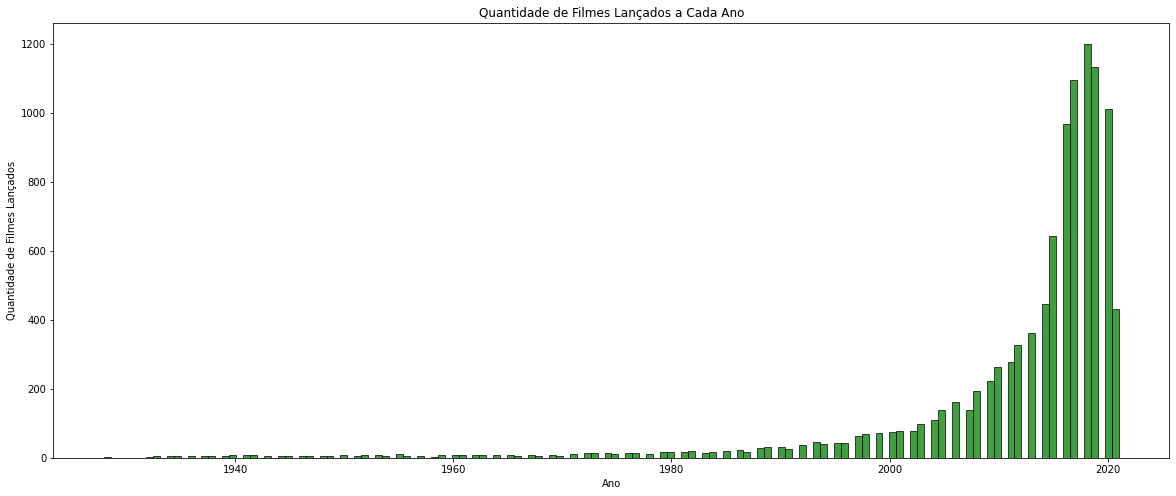

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Quantidade de Filmes Lançados a Cada Ano")
plt.ylabel("Quantidade de Filmes Lançados")
plt.xlabel("Ano")
sns.histplot(data=dados_mesclados, x="release_year", color="green")

Já tínhamos visto na análise numérica que os valores presentes nesse atributo provam que plataformas de streaming não contém filmes e séries apenas da atualidade, mas, também, outros títulos lançados há muitas décadas.

Porém, agora que criamos o gráfico, é possível notar outro comportamento relevante sobre essa coluna.

**Antes do início do século 21**, o pico de lançamentos de obras cinematográficas se deu em, aproximadamente, **75** lançamentos em 2000.

Já entre os anos 2001 e 2020, podemos observar um crescimento quase que constante, colocando o pico de lançamentos em, aproximadamente, **1200**, em 2018.

In [ ]:
75 * 16

1200

1200 é **1600%** de 75.

Dessa forma, é possível compreender que, **após o início do século 21**, essa indústria sofreu um "boom", lançando, aproximadamente, **1500%** mais obras no pico de lançamentos deste início de século do que no pico atingido no século passado.

### Coluna "duration"

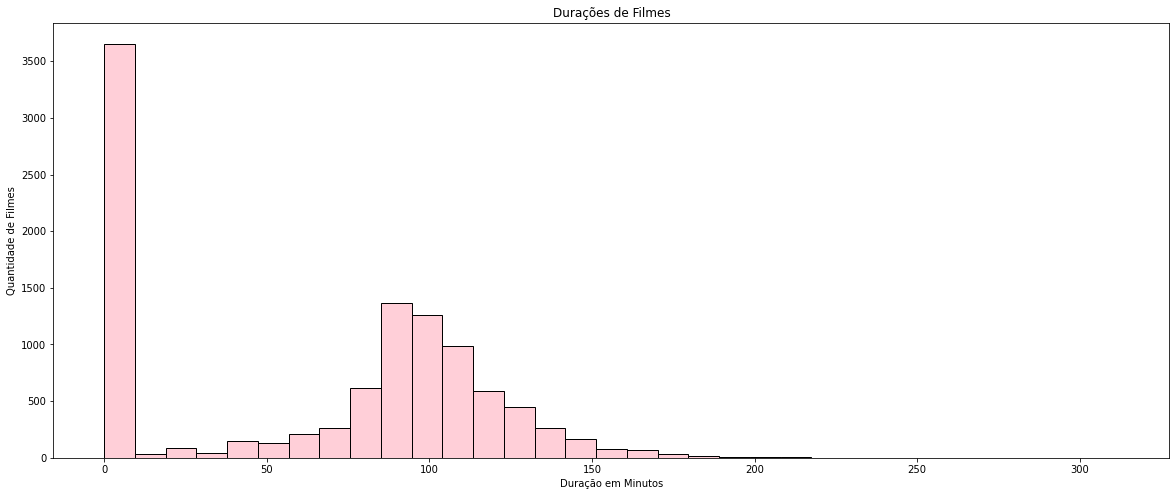

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Durações de Filmes")
plt.ylabel("Quantidade de Filmes")
plt.xlabel("Duração em Minutos")
sns.histplot(data=dados_mesclados, x="duration", color="pink")

Nesse gráfico de histogramas, é reforçado uma análise que já fizemos, a qual aponta que filmes com tempo de tela de, aproximadamente, 90 minutos, são o convencional para a duração de longa-metragens nesse dataset.

Agora, com a ajuda do gráfico, podemos detalhar mais ainda essa análise uma vez que se encontram visíveis todas as durações de filmes mais incomuns.

Podemos observar que, ambos filmes que vão ficando **cada vez mais longos** que 90 minutos e filmes que vão ficando **cada vez mais curtos** que 90 minutos caminham na direção do **aumento de sua raridade** dentro desse conjunto de dados.

### Colunas "duration" e "year_added"

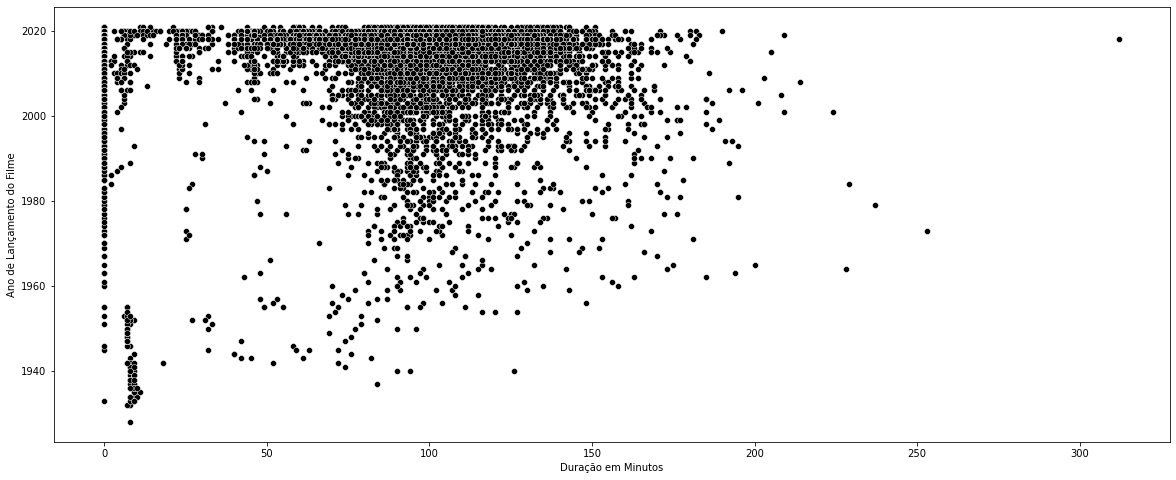

In [ ]:
plt.figure(figsize=(20,8))
plt.ylabel("Ano de Lançamento do Filme")
plt.xlabel("Duração em Minutos")
sns.scatterplot(data=dados_mesclados, x="duration", y="release_year", color="black")

O gráfico de dispersão acima inclui dois atributos: O **ano** em que uma obra foi lançada e sua respectiva **duração**.

Ao analisá-lo, é observável que, com o passar do anos, tomando como ponto de partida o ano de 1940, foi se tornando **cada vez mais comum** o aparecimento de **filmes cada vez mais longos**.

### Colunas "year_added" e "release_year"

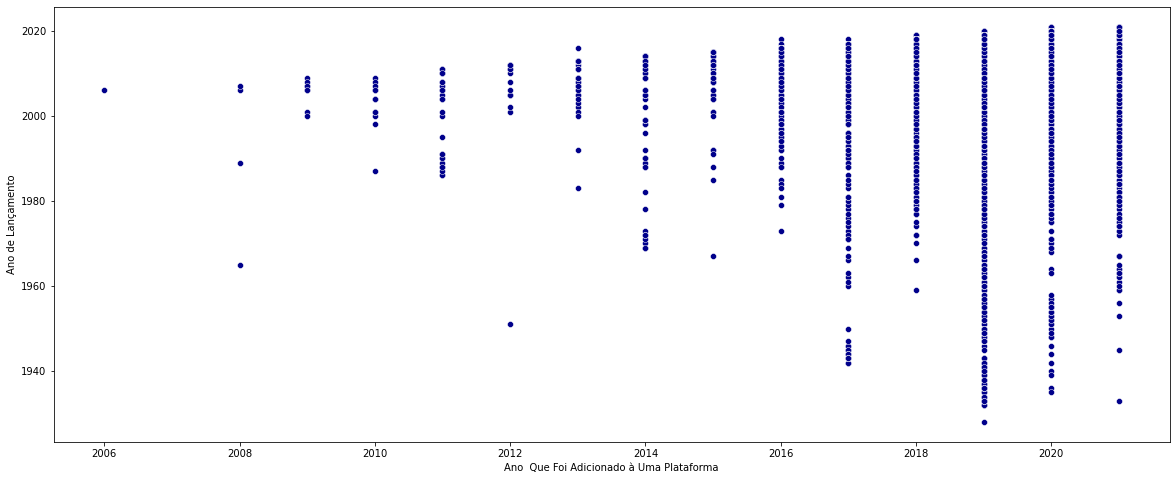

In [ ]:
plt.figure(figsize=(20,8))
plt.ylabel("Ano de Lançamento")
plt.xlabel("Ano  Que Foi Adicionado à Uma Plataforma")
sns.scatterplot(data=dados_mesclados, x="year_added", y="release_year", color="darkblue")

Neste último gráfico, o qual também é de dispersão, estamos diante dos atributos que mostram o ano em que determinada obra foi lançada e o ano em que ela foi adicionada a uma plataforma de streaming.

Nele, estamos diante de uma relação indicando que somente **nos últimos 5 anos** (2021, 2020, 2019, 2018 e 2017) que o ato de **trazer obras cinematográficas extremamente antigas** (feitas antes de 1960) para plataformas de streaming se tornou um comportamento **constante**.

## Anomalia

Durante o estudo de nosso conjunto de dados, pois possível detectar um potencial comportamente anômalo na relação entre as colunas "date_added" e "release_year".

Para visualizar esse tal comportamento anômalo, primeiramente, iremos criar um novo DataFrame contendo apenas essas duas colunas citadas acima.

Esse DataFrame se chamará "release_year_e_date_added".

In [ ]:
release_year_e_date_added = dados_mesclados[["release_year", "year_added"]]

Verificando se o DataFrame foi criado:

In [ ]:
release_year_e_date_added

,release_year,year_added
0,2018,2021
1,2021,2021
2,2021,2021
3,2021,2021
4,2021,2021
...,...,...
10476,2007,2009
10477,2006,2009
10478,1989,2008
10479,1965,2008


Agora, para entender o comportamento anômalo, é preciso se recordar de como as colunas "release_year" e "date_added" se apresentam.

**O atributo "release_year" indica o ano em que determinada obra foi lançada, ou seja, o ano em que ela finalmente ficou disponível para ser assistida.**

**Já o atributo "date_added", após as transformações acima, indica o ano em que determinada obra foi adicionada para ser assistida em uma plataforma de streaming.**

Com isso em mente, iremos, abaixo, tentar criar um DataFrame que guarda apenas instâncias em que o ano de lançamento da obra se encontra **maior** do que o ano em que ela ficou disponível em uma plataforma de streaming.

Chamaremos esse novo DataFrame de "dados_anomalos".

In [ ]:
dados_anomalos = release_year_e_date_added[release_year_e_date_added["release_year"] > (release_year_e_date_added["year_added"]).astype("int")]

Visualizando o DataFrame:

In [ ]:
dados_anomalos

,release_year,year_added
2427,2021,2020
2564,2021,2020
3708,2021,2020
3939,2020,2019
4050,2020,2019
4129,2020,2019
4184,2020,2019
5467,2019,2018
5468,2019,2018
5971,2018,2017


**Os resultados acima dizem que, no nosso dataset, existe uma anomalia a qual permite que filmes ou séries estejam presentes em plataformas de streaming antes mesmo de serem lançados.**

## Análise de tendências

Dentro do nosso conjunto de dados, existem filmes e séries categorizados como "Horror", ou seja, são filmes de terror.

Esse tipo de gênero está frequentemente relacionado à imposição de um sentimento negativo na audiência.

Para atingir esse sentimento negativo, essas obras podem adotar das mais diversas estratégias, podendo variar desde a utilização de simples sustos até cenas extremamente gráficas.

Diante disso, vamos coletar, do nosso dataset, todas as classificações indicativas de todas as obras que possuem o gênero "Horror".

Iremos guardá-las numa variável chamada "classificacoes_de_filmes_de_terror".

In [ ]:
classificacoes_de_filmes_de_terror = []

for i in range(0, len(dados_mesclados)):
  if "Horror" in dados_mesclados.loc[i, "listed_in"]:
    classificacoes_de_filmes_de_terror.append(dados_mesclados.loc[i, "rating"])

Agora, para conseguirmos utilizar a função "value_counts" nessa lista, iremos convertê-la para a estrutura de dados "Series", da biblioteca "pandas".

In [ ]:
classificacoes_de_filmes_de_terror = pd.Series(classificacoes_de_filmes_de_terror)

Após a conversão, vamos checar a quantidade de vezes que cada classificação indicativa aparece nas obras de terror.

In [ ]:
classificacoes_de_filmes_de_terror.value_counts()

TV-MA    233
R        143
TV-14     68
PG-13     55
TV-PG      7
NR         7
PG         5
dtype: int64

Ao observar os resultados acima, podemos perceber que a maior parte dos filmes e séries com gênero "Horror" estão com classificações indicativas de "R" e "TV-MA".

Essas duas classificações, segundo a Classification and Ratings Administration e a TV Parental Guidelines, advertem que a obra não é indicada para menores de **17** anos sem o acompanhamento adulto.

Ao somarmos a quantidade de vezes que essas duas classificações aparecem, temos o valor **376** do total de 518 classificações de obras de "Horror".

376 é, aproximadamente, **72%** de 518.

**Diante disso, podemos inferir que filmes e séries com gênero "Horror" possuem uma tendência a se inclinarem mais para uma audiência mais madura, ou seja, acima de 17 anos.**

## Análise de correlações

Nesta seção, iremos interpretar as correlações existentes em nosso conjunto de dados.

Para realizar essa tarefa, faremos uso de um gráfico de "heatmap", o qual será gerado através da biblioteca "seaborn".

Entretanto, antes de gerar o gráfico, criaremos uma variável para guardar a matriz de correlação de nosso dataset, a qual pode ser criada através da função "corr".

Essa variável irá se chamar "matriz_de_correlacao".

In [ ]:
matriz_de_correlacao = dados_mesclados.corr()

Após isso, geraremos o "heatmat" passando a matriz criada acima como argumento.

O resultado será um gráfico mostrando, através de cores e números, o grau de correlação dos atributos de nosso conjunto de dados.

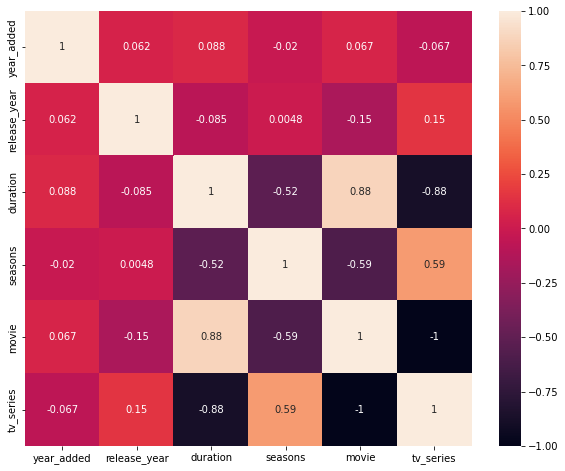

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=matriz_de_correlacao, annot=True)

Após observar as correlações acima, podemos imediatamente identificar que as colunas com **maior grau de correlação positiva** são "duration" e "movie". Esse elevado nível de correlação faz total sentido uma vez a coluna "duration" apenas registra a duração, em minutos, de filmes, mas não de séries, ou seja, a coluna "movie" é o atributo mais influente na coluna "duration".

Já as colunas com maior grau de **correlação negativa** deste gráfico são "movie" e "tv_series", registrando o valor **-1**, o qual é a **mais alta** correlação negativa possível. Isso acontece ao levarmos em consideração que essas colunas são  opostas, ou seja, se a primeira registrar o valor **1**, a segunda, obrigatoriamente, precisará registrar o valor **0**. Isso ocorre pois uma obra não pode ser um filme e série ao mesmo tempo.

Indo para o segundo lugar em grau de **correlação negativa**, temos as colunas "tv_series" e "duration". Essa correlação se encontra em elevada negatividade pelo fato de que o valor contido no atributo "tv_series" é extremamente relevante para determinar qual o valor de "duration". Caso "tv_series" esteja marcando **1**, por exemplo, a coluna "duration" deverá, obrigatoriamente, marcar o valor **0**, pois o atributo "duration" não registra a duração de séries. A coluna que contém a duração de séries, em temporadas, é a "seasons", e, por causa disso, se observarmos no gráfico, "seasons" e "tv_series" estão com considerável grau de correlação.

Por último, foi possível inferir que o atributo "release_year" é o que menos está correlacionado com o resto dos atributos do dataset, atingindo uma **correlação positiva máxima** de **0.15** com "tv_series" e uma **correlação negativa máxima** de **-0.15** com "movie". Isso faz sentido ao considerarmos que essa coluna não é extremamente influenciada por nenhuma outra nesse conjunto de dados, afinal, ela apenas registra o ano em que determinada obra foi lançada.